In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
torch.cuda.is_available()

True

In [3]:
# 1 对图像进行处理
transform = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ])

# 2 读取数据
trainset = torchvision.datasets.CIFAR10(root = 'data', train = True, download = False, transform = transform)
trainloader = torch.utils.data.DataLoader (trainset, batch_size = 128, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = 'data', train = False, download = False, transform = transform)
testloader = torch.utils.data.DataLoader (testset, batch_size = 128, shuffle = True, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

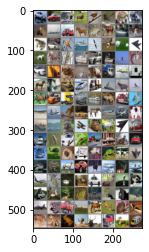

  car   car horse  deer


In [4]:
# 3 显示一个图片
import matplotlib.pyplot as plt
import numpy as np

def imshow (img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow (np.transpose(npimg, (1, 2, 0)))
    plt.show ()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow (torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
# 4 神经忘了的搭建
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):
    def __init__ (self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d (3, 6, 5)
        self.pool  = nn.MaxPool2d (2, 2)
        self.conv2 = nn.Conv2d (6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
    
    def forward (self, x):
        x = self.pool (F.relu(self.conv1(x)))
        x = self.pool (F.relu(self.conv2(x)))
        x = x.view (-1, 16 * 5 * 5)
        x = F.relu (self.fc1(x))
        x = F.relu (self.fc2(x))
        x = F.relu (self.fc3(x))
        return x

net = Net().cuda()

In [6]:
# 5 定义一个损失优化器
import torch.optim as optim

criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [7]:
for epoch in range (200):
    
    running_loss = 0.0
    for i, data in enumerate (trainloader, 0):
        # 1 获取数据
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda() # add this line
        # 2 初始化梯度
        optimizer.zero_grad()
        # 3  forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # 4 打印信息
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            print (torch.cuda.memory_cached())
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.230
27262976
[2,   200] loss: 0.230
27262976
[3,   200] loss: 0.230
27262976
[4,   200] loss: 0.229
27262976
[5,   200] loss: 0.228
27262976
[6,   200] loss: 0.226
27262976
[7,   200] loss: 0.218
27262976
[8,   200] loss: 0.205
27262976
[9,   200] loss: 0.196
27262976
[10,   200] loss: 0.190
27262976
[11,   200] loss: 0.183
27262976
[12,   200] loss: 0.168
27262976
[13,   200] loss: 0.161
27262976
[14,   200] loss: 0.156
27262976
[15,   200] loss: 0.152
27262976
[16,   200] loss: 0.149
27262976
[17,   200] loss: 0.147
27262976
[18,   200] loss: 0.143
27262976
[19,   200] loss: 0.141
27262976
[20,   200] loss: 0.140
27262976
[21,   200] loss: 0.136
27262976
[22,   200] loss: 0.134
27262976
[23,   200] loss: 0.132
27262976
[24,   200] loss: 0.131
27262976
[25,   200] loss: 0.128
27262976
[26,   200] loss: 0.128
27262976
[27,   200] loss: 0.125
27262976
[28,   200] loss: 0.123
27262976
[29,   200] loss: 0.122
27262976
[30,   200] loss: 0.119
27262976
[31,   200] loss: 0

In [8]:
outputs = net(images.cuda())

In [9]:
outputs

tensor([[19.6259,  0.0000, 10.9037,  ...,  0.0000,  0.0000,  0.0000],
        [20.5075,  0.4592,  0.0000,  ...,  0.0000,  0.0000,  9.4960],
        [16.7304, 17.9018,  0.0000,  ...,  0.0000,  2.1749, 13.8024],
        ...,
        [ 7.9099,  0.0000,  1.3505,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  6.5341,  ...,  0.0000,  0.0000,  0.0000],
        [ 5.4908,  0.0000,  8.5502,  ..., 15.5024,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ReluBackward0>)

In [10]:
_, predicted = torch.max(outputs, 1)

In [11]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  plane plane   car   car


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 72 %
Accuracy of   car : 73 %
Accuracy of  bird : 50 %
Accuracy of   cat : 42 %
Accuracy of  deer : 52 %
Accuracy of   dog : 40 %
Accuracy of  frog : 67 %
Accuracy of horse : 62 %
Accuracy of  ship : 71 %
Accuracy of truck : 76 %
